In [1]:
!pip install imblearn

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.3.1 requires grpcio<2.0dev,>=1.47.0, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.
google-cloud-bigquery 3.3.1 requires protobuf<4.0.0dev,>=3.12.0, but you have protobuf 4.23.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

## DATASET
---

UCI Machine Learning Repository : https://archive.ics.uci.edu/datasets

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


In [4]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df= pd.read_csv('magic_gamma_telescope_data/magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
df['class']=(df['class']=='g').astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

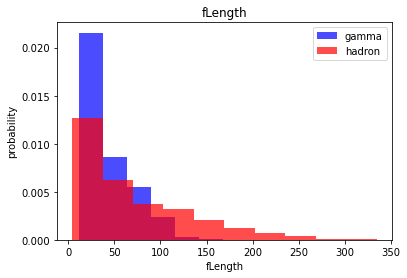

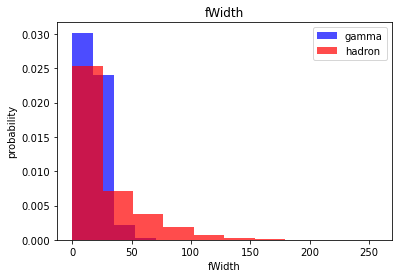

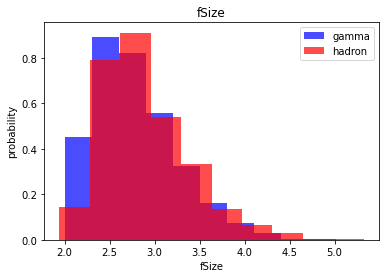

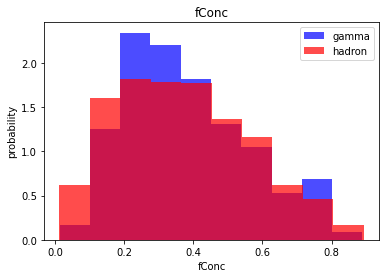

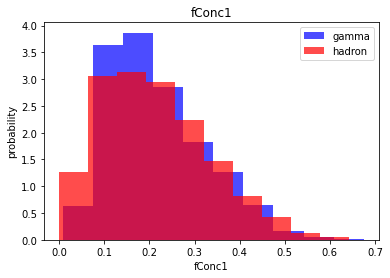

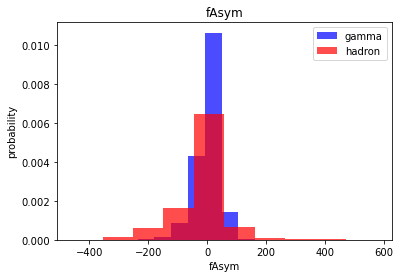

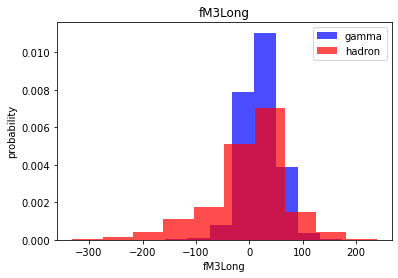

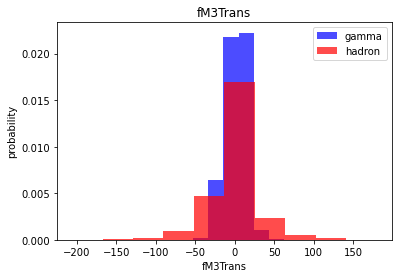

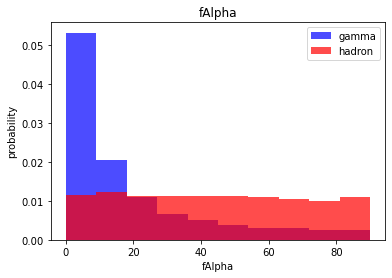

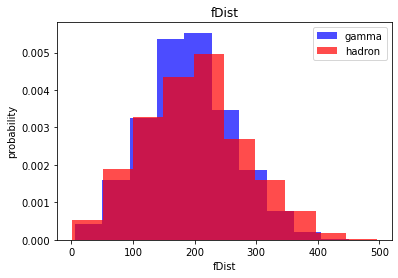

In [8]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color = 'blue', label='gamma', alpha = 0.7 , density = True)
  plt.hist(df[df['class']==0][label], color = 'red', label='hadron', alpha = 0.7 , density = True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

# Preprocesing
- Split into train, validate and test
- Scale and perform oversampling

In [9]:
train,validate,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [10]:
def scale(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y,(-1,1))))
  return data, X, y

In [11]:
print(len(df[df["class"]==1]))
print(len(df[df["class"]==0]))

print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

12332
6688
7354
4058


In [12]:
train, X_train, y_train = scale(train, oversample = True)
test, X_test, y_test = scale(test, oversample = False)
valid, X_valid, y_valid = scale(validate, oversample = False)

## **KNN**

## K-Nearest Neighbour Algorithm

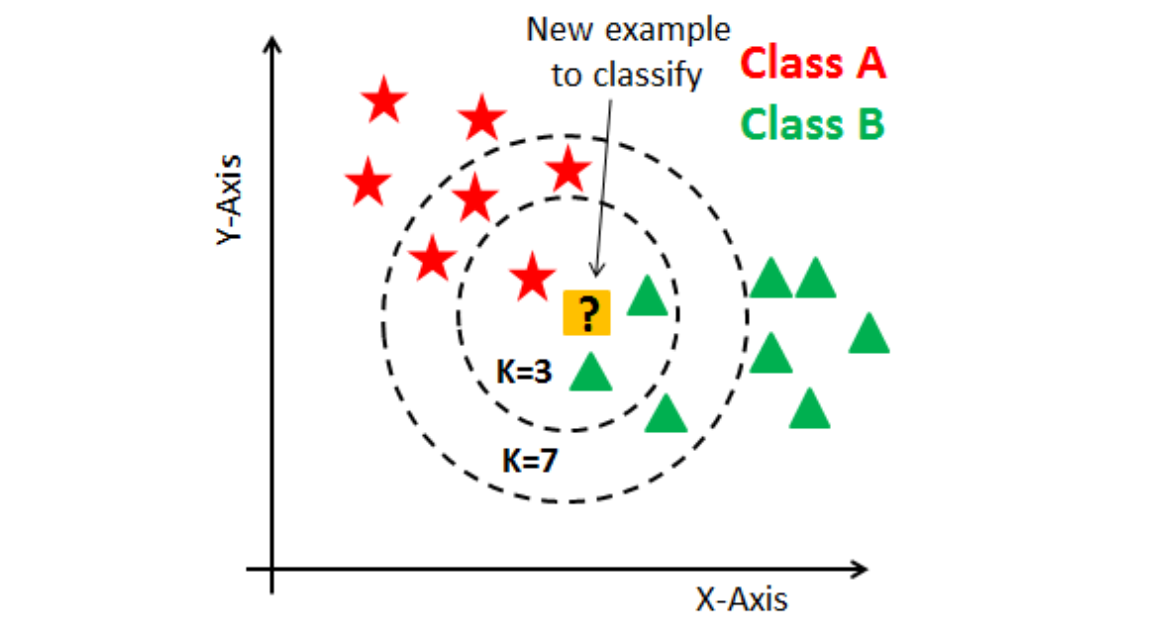

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(y_pred)
print(y_test)

[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1311
           1       0.86      0.87      0.87      2493

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## **Navie Bayes**

## Navie Bayes

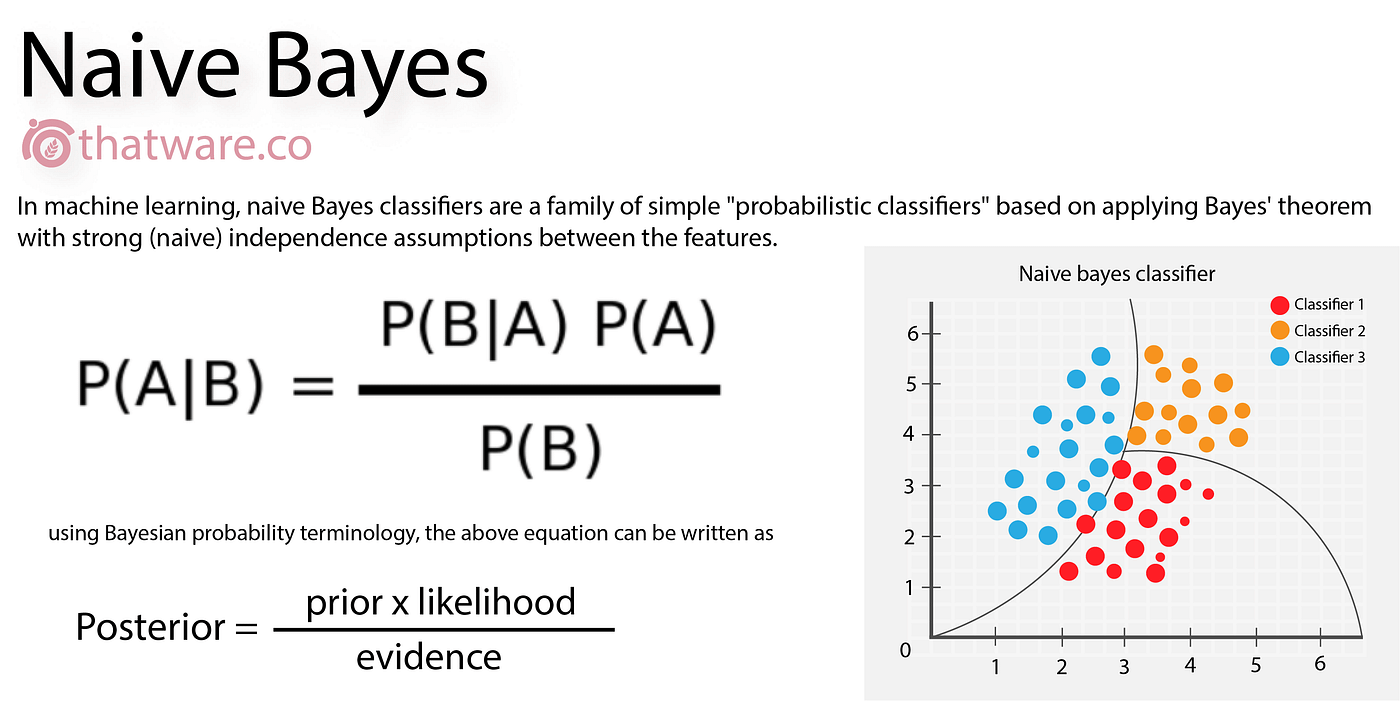

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred = nb_model.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1311
           1       0.74      0.90      0.81      2493

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

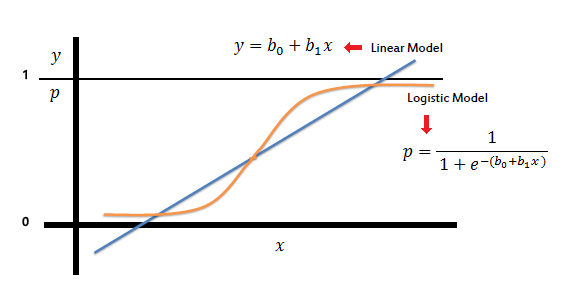

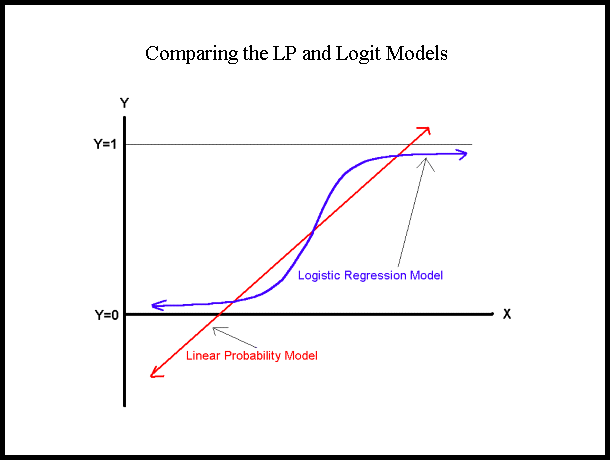

In [22]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = nb_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1311
           1       0.74      0.90      0.81      2493

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#SVM (Support Vector Machine)

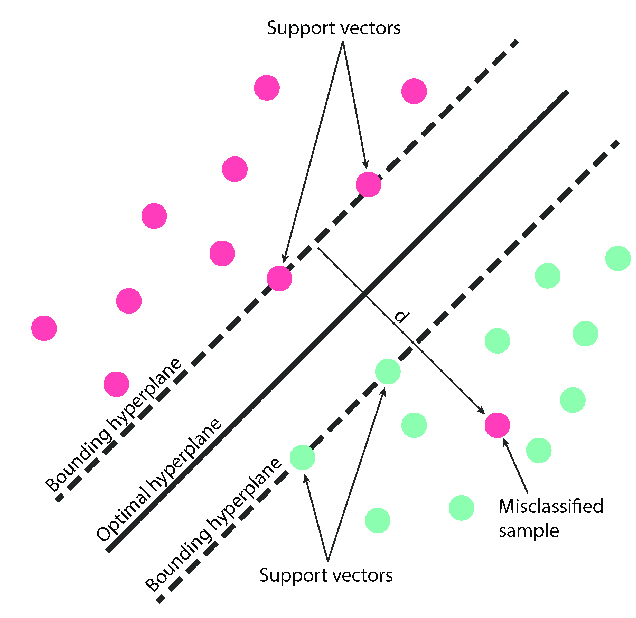

In [25]:
from sklearn.svm import SVC # support vector classifier

svm_model = SVC( kernel = 'rbf') # using radial basis function / gaussian kernel
svm_model.fit(X_train, y_train)

SVC()

In [26]:
y_pred = svm_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1311
           1       0.90      0.90      0.90      2493

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Network (Basics)

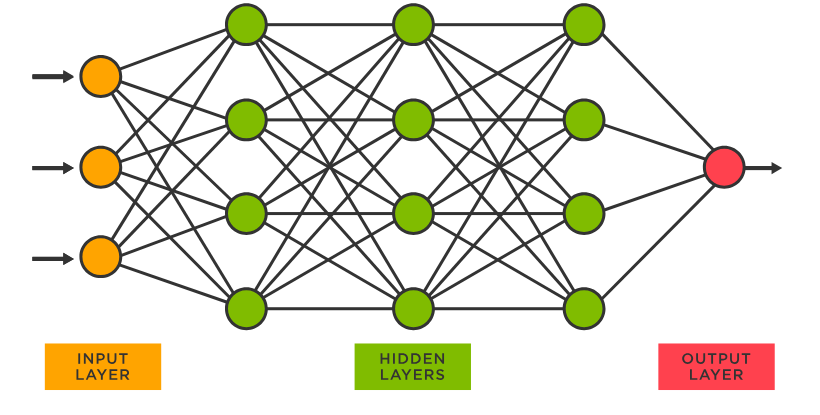

In [28]:
import tensorflow as tf

nm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nm_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# summarize history for accuracy
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [30]:
history = nm_model.fit(
    X_train,y_train,
    epochs=100, batch_size=32, validation_split =0.2
)

Epoch 1/100
368/368 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7706 - val_loss: 0.6161 - val_accuracy: 0.6366
Epoch 2/100
368/368 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8311 - val_loss: 0.6111 - val_accuracy: 0.6798
Epoch 3/100
368/368 [==============================] - 1s 1ms/step - loss: 0.3616 - accuracy: 0.8506 - val_loss: 0.5215 - val_accuracy: 0.7315
Epoch 4/100
368/368 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8548 - val_loss: 0.4906 - val_accuracy: 0.7519
Epoch 5/100
368/368 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8590 - val_loss: 0.5521 - val_accuracy: 0.7138
Epoch 6/100
368/368 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8591 - val_loss: 0.4623 - val_accuracy: 0.7682
Epoch 7/100
368/368 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8612 - val_loss: 0.5482 - val_accuracy: 0.7264

Epoch 58/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8812 - val_loss: 0.4514 - val_accuracy: 0.7675
Epoch 59/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8818 - val_loss: 0.4659 - val_accuracy: 0.7631
Epoch 60/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8835 - val_loss: 0.3727 - val_accuracy: 0.8069
Epoch 61/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8819 - val_loss: 0.3904 - val_accuracy: 0.7893
Epoch 62/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.8831 - val_loss: 0.4427 - val_accuracy: 0.7709
Epoch 63/100
368/368 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8824 - val_loss: 0.4619 - val_accuracy: 0.7604
Epoch 64/100
368/368 [==============================] - 1s 1ms/step - loss: 0.2754 - accuracy: 0.8831 - val_loss: 0.4029 - val_accuracy:

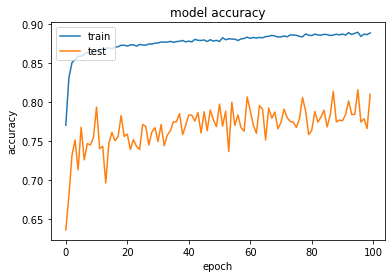

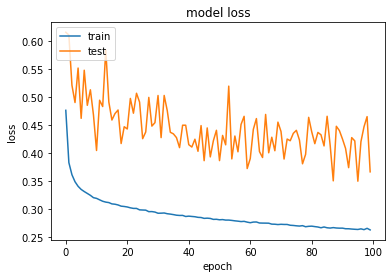

In [31]:
plot_accuracy(history)
plot_loss(history)

## Optimized Code of Neural Network

In [32]:
# summarize history for accuracy
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize =(10,4))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='upper left')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')

  plt.show()

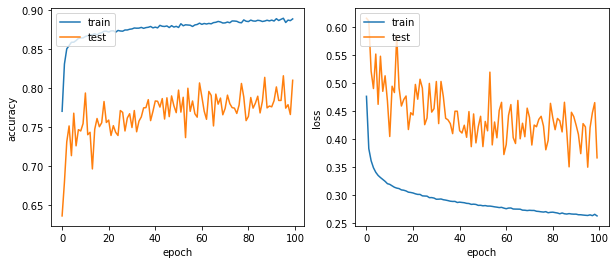

In [33]:
plot_history(history)

In [34]:
import tensorflow as tf

def train_model(X_train,y_train,nodes,droupout_prob,epochs,lr,batch_size,validation_split):
  nm_model = tf.keras.Sequential([
      tf.keras.layers.Dense(nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(droupout_prob),
      tf.keras.layers.Dense(nodes, activation='relu'),
      tf.keras.layers.Dropout(droupout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nm_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy']) # lr is learning rate
  history = nm_model.fit(
      X_train,y_train,epochs=epochs, batch_size=batch_size, validation_split = validation_split, verbose =0
  )
  return nm_model,history

Nodes: 16 , dropout rate: 0.1, learning rate: 0.01 and batch size: 32


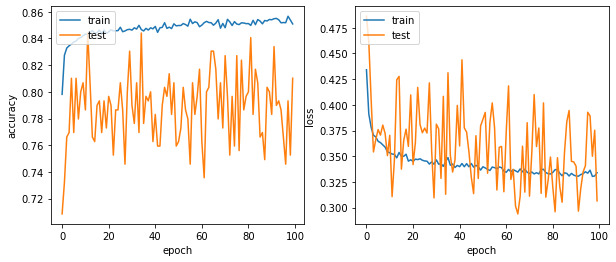

119/119 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8630
0.3338426649570465
Nodes: 16 , dropout rate: 0.1, learning rate: 0.01 and batch size: 64


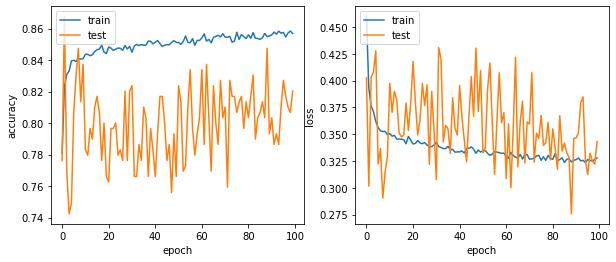

119/119 [==============================] - 0s 879us/step - loss: 0.3287 - accuracy: 0.8670
0.3287338614463806
Nodes: 16 , dropout rate: 0.1, learning rate: 0.01 and batch size: 128


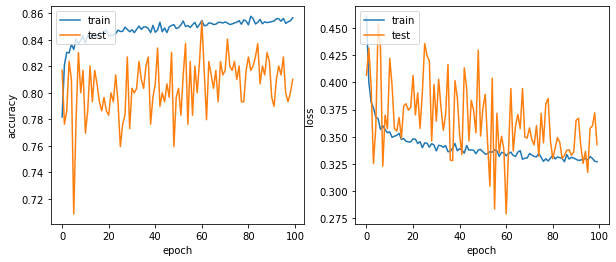

119/119 [==============================] - 0s 993us/step - loss: 0.3319 - accuracy: 0.8651
0.3319249749183655
Nodes: 16 , dropout rate: 0.1, learning rate: 0.005 and batch size: 32


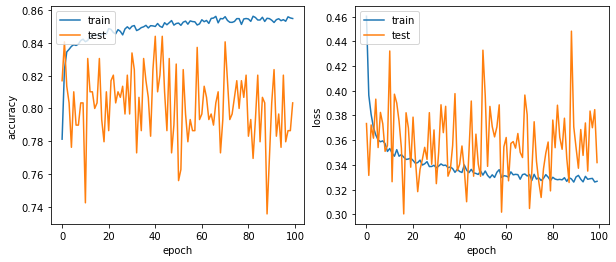

119/119 [==============================] - 0s 733us/step - loss: 0.3251 - accuracy: 0.8630
0.32514315843582153
Nodes: 16 , dropout rate: 0.1, learning rate: 0.005 and batch size: 64


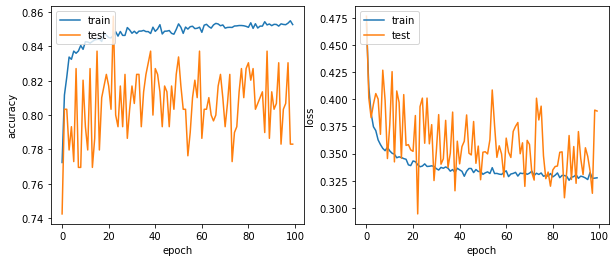

119/119 [==============================] - 0s 942us/step - loss: 0.3254 - accuracy: 0.8641
0.32541489601135254
Nodes: 16 , dropout rate: 0.1, learning rate: 0.005 and batch size: 128


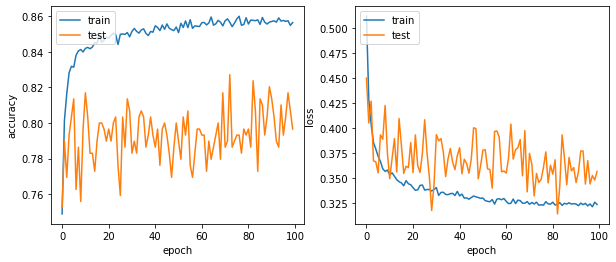

119/119 [==============================] - 0s 891us/step - loss: 0.3232 - accuracy: 0.8667
0.32319697737693787
Nodes: 16 , dropout rate: 0.1, learning rate: 0.001 and batch size: 32


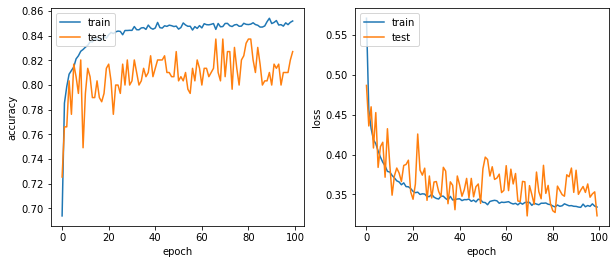

119/119 [==============================] - 0s 949us/step - loss: 0.3375 - accuracy: 0.8557
0.3375421166419983
Nodes: 16 , dropout rate: 0.1, learning rate: 0.001 and batch size: 64


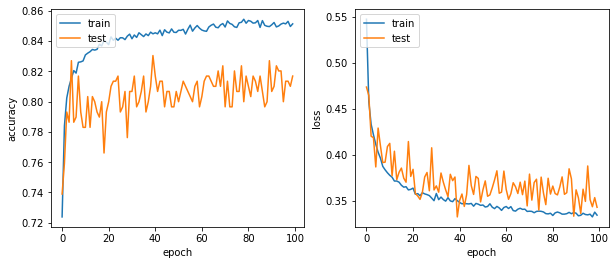

119/119 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8628
0.3293350636959076
Nodes: 16 , dropout rate: 0.1, learning rate: 0.001 and batch size: 128


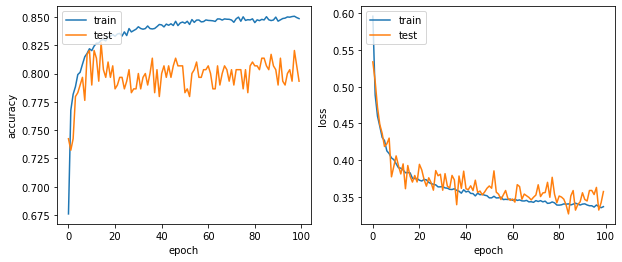

119/119 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8633
0.32376065850257874
Nodes: 16 , dropout rate: 0.2, learning rate: 0.01 and batch size: 32


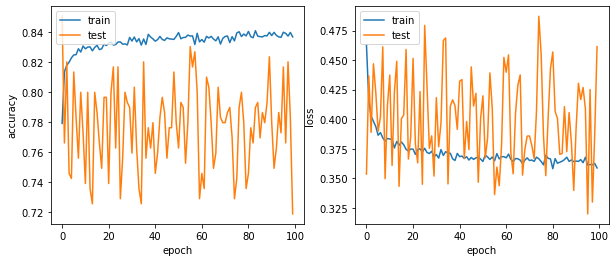

119/119 [==============================] - 0s 886us/step - loss: 0.3277 - accuracy: 0.8636
0.32768502831459045
Nodes: 16 , dropout rate: 0.2, learning rate: 0.01 and batch size: 64


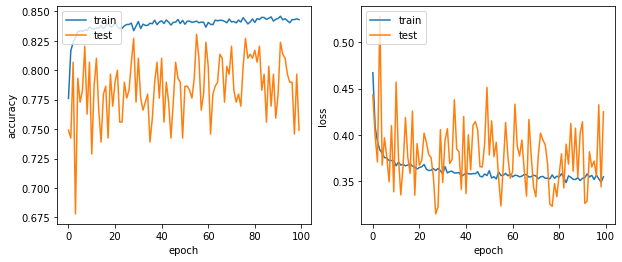

119/119 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8680
0.32905858755111694
Nodes: 16 , dropout rate: 0.2, learning rate: 0.01 and batch size: 128


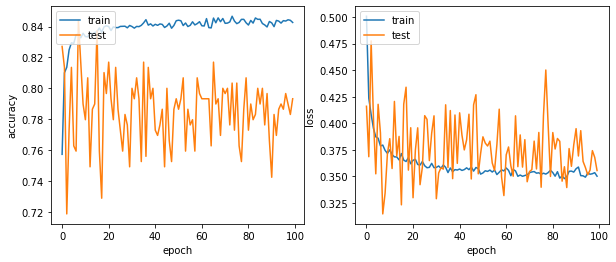

119/119 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8641
0.3331988453865051
Nodes: 16 , dropout rate: 0.2, learning rate: 0.005 and batch size: 32


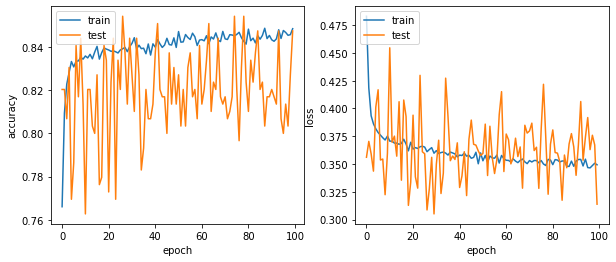

119/119 [==============================] - 0s 700us/step - loss: 0.3441 - accuracy: 0.8544
0.34407392144203186
Nodes: 16 , dropout rate: 0.2, learning rate: 0.005 and batch size: 64


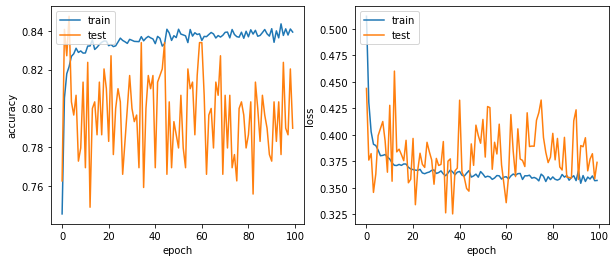

119/119 [==============================] - 0s 875us/step - loss: 0.3419 - accuracy: 0.8609
0.3418543040752411
Nodes: 16 , dropout rate: 0.2, learning rate: 0.005 and batch size: 128


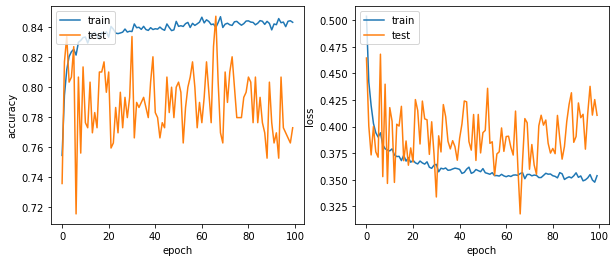

119/119 [==============================] - 0s 791us/step - loss: 0.3285 - accuracy: 0.8623
0.3285088539123535
Nodes: 16 , dropout rate: 0.2, learning rate: 0.001 and batch size: 32


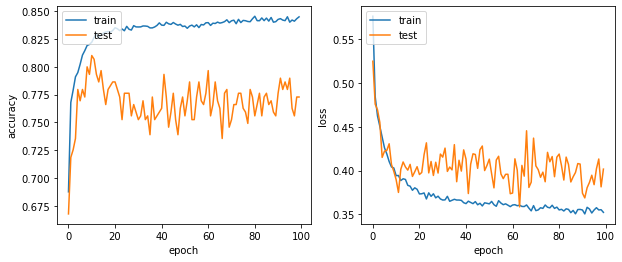

119/119 [==============================] - 0s 905us/step - loss: 0.3253 - accuracy: 0.8670
0.32526445388793945
Nodes: 16 , dropout rate: 0.2, learning rate: 0.001 and batch size: 64


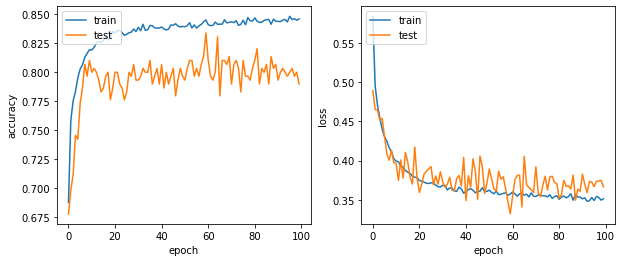

119/119 [==============================] - 0s 648us/step - loss: 0.3328 - accuracy: 0.8601
0.33276984095573425
Nodes: 16 , dropout rate: 0.2, learning rate: 0.001 and batch size: 128


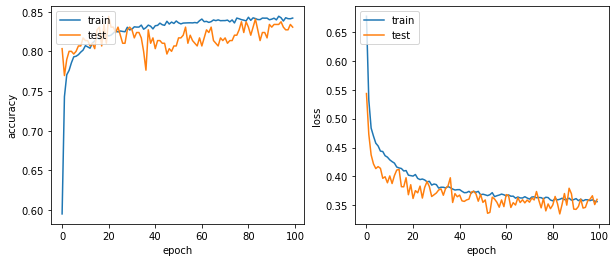

119/119 [==============================] - 0s 665us/step - loss: 0.3357 - accuracy: 0.8573
0.3356807827949524
Nodes: 16 , dropout rate: 0.25, learning rate: 0.01 and batch size: 32


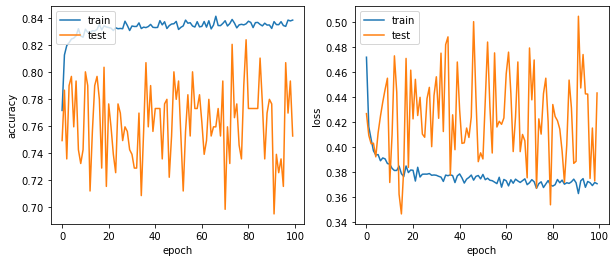

119/119 [==============================] - 0s 625us/step - loss: 0.3469 - accuracy: 0.8594
0.3468920886516571
Nodes: 16 , dropout rate: 0.25, learning rate: 0.01 and batch size: 64


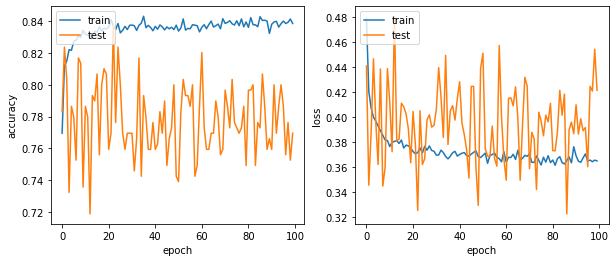

119/119 [==============================] - 0s 665us/step - loss: 0.3352 - accuracy: 0.8609
0.3352380096912384
Nodes: 16 , dropout rate: 0.25, learning rate: 0.01 and batch size: 128


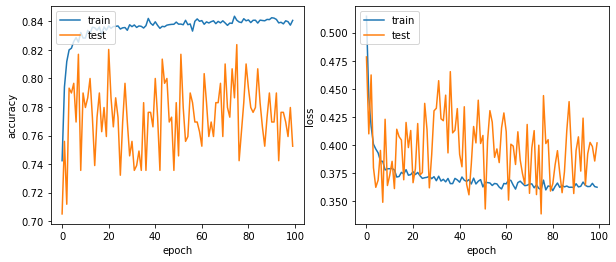

119/119 [==============================] - 0s 664us/step - loss: 0.3320 - accuracy: 0.8633
0.33199623227119446
Nodes: 16 , dropout rate: 0.25, learning rate: 0.005 and batch size: 32


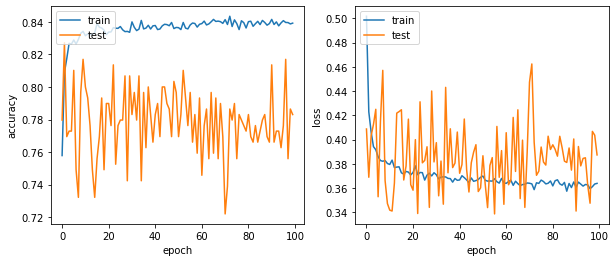

119/119 [==============================] - 0s 796us/step - loss: 0.3354 - accuracy: 0.8599
0.3353545069694519
Nodes: 16 , dropout rate: 0.25, learning rate: 0.005 and batch size: 64


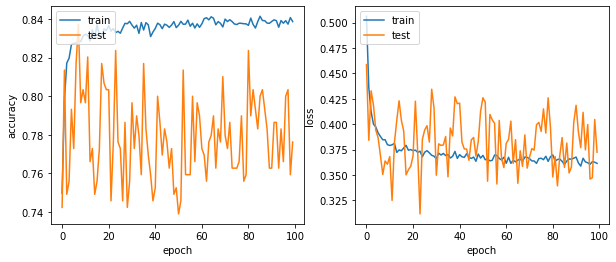

119/119 [==============================] - 0s 702us/step - loss: 0.3321 - accuracy: 0.8630
0.33205288648605347
Nodes: 16 , dropout rate: 0.25, learning rate: 0.005 and batch size: 128


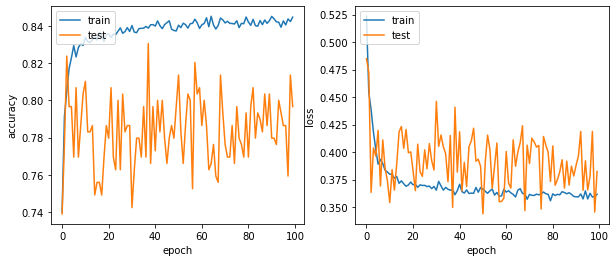

119/119 [==============================] - 0s 802us/step - loss: 0.3344 - accuracy: 0.8601
0.33442866802215576
Nodes: 16 , dropout rate: 0.25, learning rate: 0.001 and batch size: 32


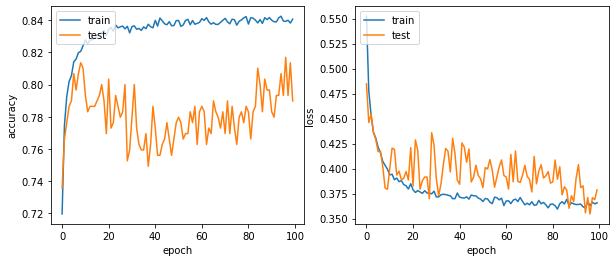

119/119 [==============================] - 0s 662us/step - loss: 0.3459 - accuracy: 0.8559
0.345915824174881
Nodes: 16 , dropout rate: 0.25, learning rate: 0.001 and batch size: 64


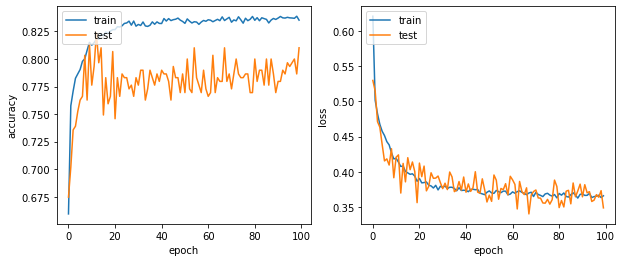

119/119 [==============================] - 0s 674us/step - loss: 0.3390 - accuracy: 0.8583
0.33895784616470337
Nodes: 16 , dropout rate: 0.25, learning rate: 0.001 and batch size: 128


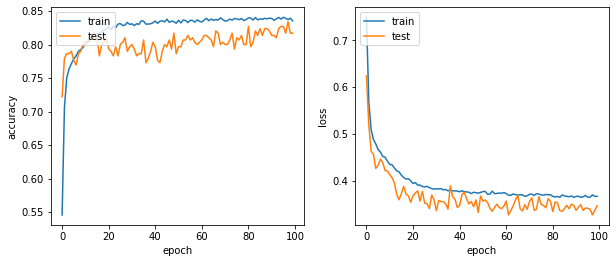

119/119 [==============================] - 0s 946us/step - loss: 0.3461 - accuracy: 0.8565
0.3461284041404724
Nodes: 32 , dropout rate: 0.1, learning rate: 0.01 and batch size: 32


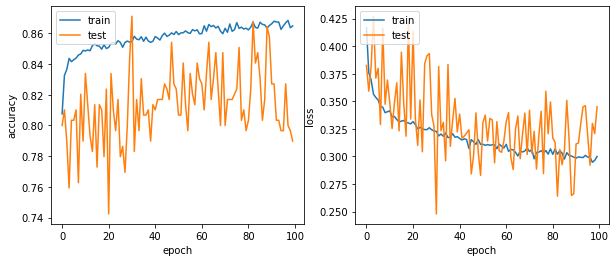

119/119 [==============================] - 0s 697us/step - loss: 0.3219 - accuracy: 0.8738
0.321898490190506
Nodes: 32 , dropout rate: 0.1, learning rate: 0.01 and batch size: 64


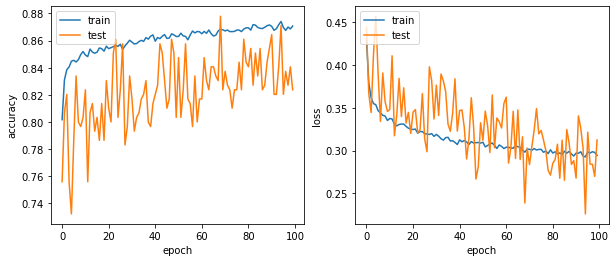

119/119 [==============================] - 0s 677us/step - loss: 0.3275 - accuracy: 0.8693
0.32747161388397217
Nodes: 32 , dropout rate: 0.1, learning rate: 0.01 and batch size: 128


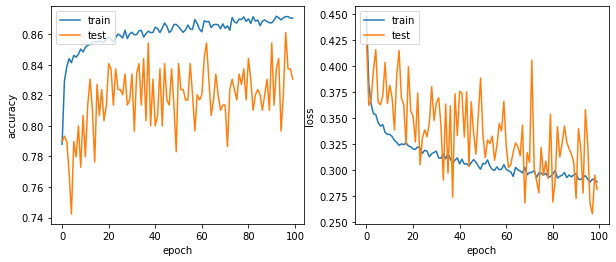

119/119 [==============================] - 0s 671us/step - loss: 0.3313 - accuracy: 0.8620
0.33134862780570984
Nodes: 32 , dropout rate: 0.1, learning rate: 0.005 and batch size: 32


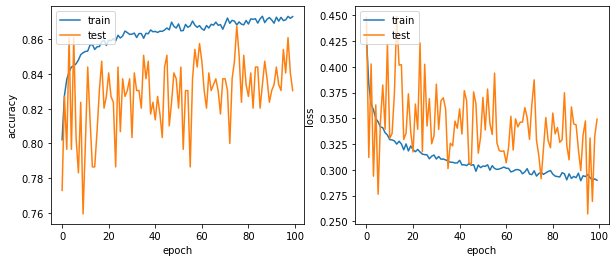

119/119 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8707
0.32143571972846985
Nodes: 32 , dropout rate: 0.1, learning rate: 0.005 and batch size: 64


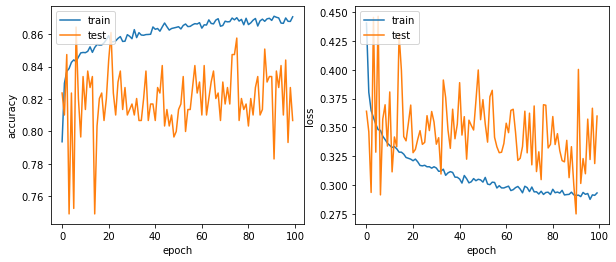

119/119 [==============================] - 0s 705us/step - loss: 0.3201 - accuracy: 0.8707
0.3200500011444092
Nodes: 32 , dropout rate: 0.1, learning rate: 0.005 and batch size: 128


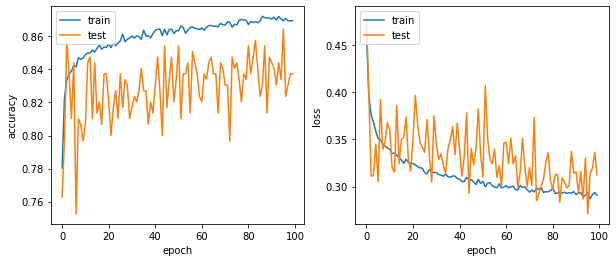

119/119 [==============================] - 0s 792us/step - loss: 0.3156 - accuracy: 0.8717
0.3155932128429413
Nodes: 32 , dropout rate: 0.1, learning rate: 0.001 and batch size: 32


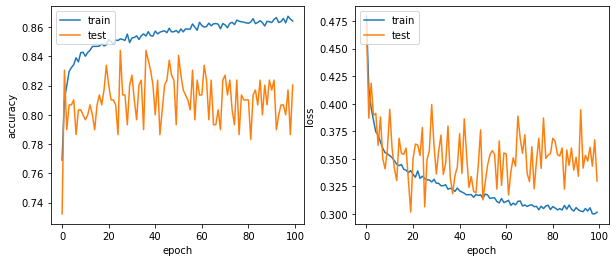

119/119 [==============================] - 0s 895us/step - loss: 0.3267 - accuracy: 0.8591
0.32673370838165283
Nodes: 32 , dropout rate: 0.1, learning rate: 0.001 and batch size: 64


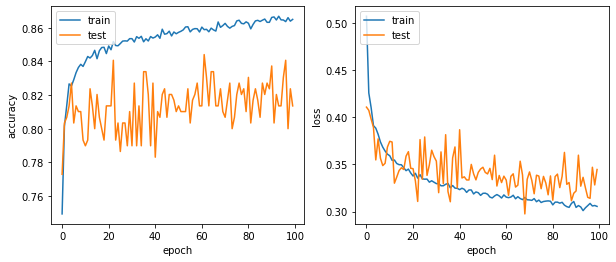

119/119 [==============================] - 0s 802us/step - loss: 0.3165 - accuracy: 0.8707
0.31652402877807617
Nodes: 32 , dropout rate: 0.1, learning rate: 0.001 and batch size: 128


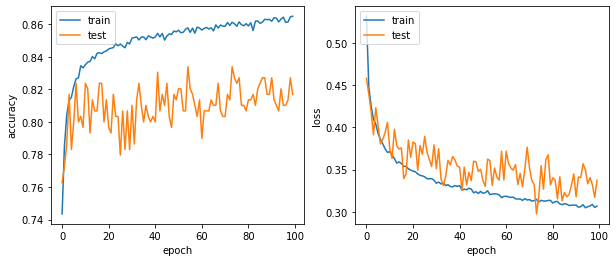

119/119 [==============================] - 0s 720us/step - loss: 0.3124 - accuracy: 0.8712
0.3123955726623535
Nodes: 32 , dropout rate: 0.2, learning rate: 0.01 and batch size: 32


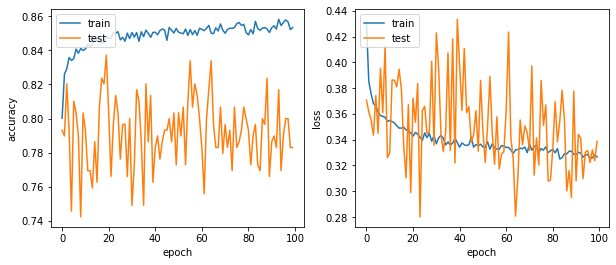

119/119 [==============================] - 0s 815us/step - loss: 0.3324 - accuracy: 0.8693
0.33243900537490845
Nodes: 32 , dropout rate: 0.2, learning rate: 0.01 and batch size: 64


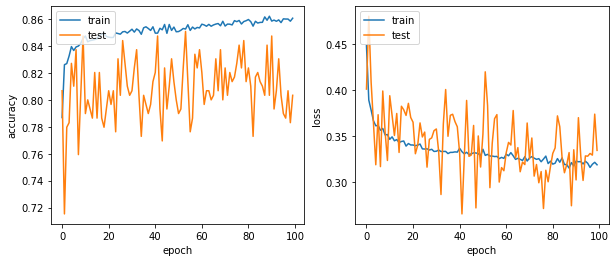

119/119 [==============================] - 0s 735us/step - loss: 0.3217 - accuracy: 0.8638
0.3217346668243408
Nodes: 32 , dropout rate: 0.2, learning rate: 0.01 and batch size: 128


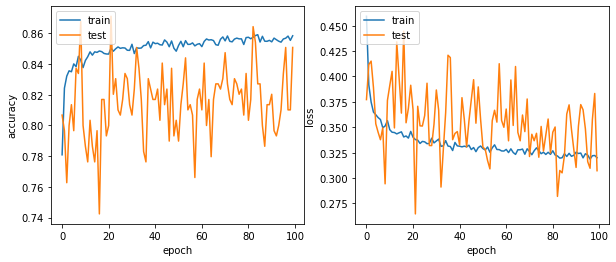

119/119 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8567
0.3353846073150635
Nodes: 32 , dropout rate: 0.2, learning rate: 0.005 and batch size: 32


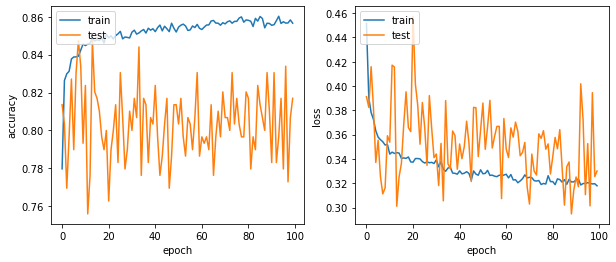

119/119 [==============================] - 0s 857us/step - loss: 0.3256 - accuracy: 0.8693
0.32560649514198303
Nodes: 32 , dropout rate: 0.2, learning rate: 0.005 and batch size: 64


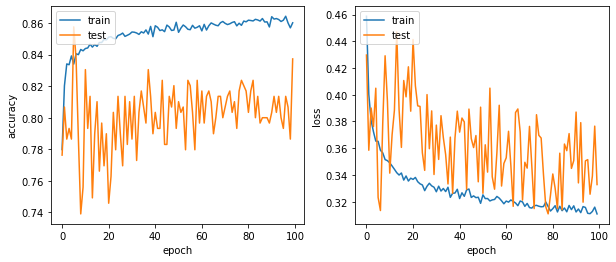

119/119 [==============================] - 0s 817us/step - loss: 0.3179 - accuracy: 0.8675
0.3179013133049011
Nodes: 32 , dropout rate: 0.2, learning rate: 0.005 and batch size: 128


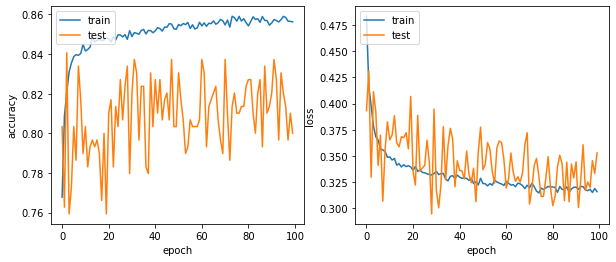

119/119 [==============================] - 0s 770us/step - loss: 0.3149 - accuracy: 0.8693
0.3149205148220062
Nodes: 32 , dropout rate: 0.2, learning rate: 0.001 and batch size: 32


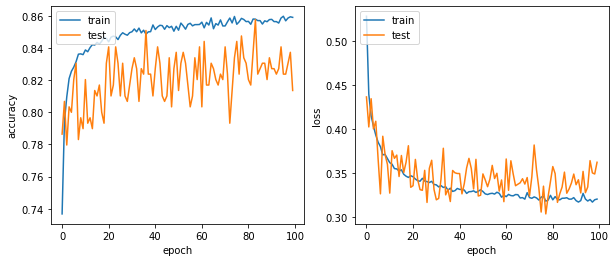

119/119 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8725
0.31773221492767334
Nodes: 32 , dropout rate: 0.2, learning rate: 0.001 and batch size: 64


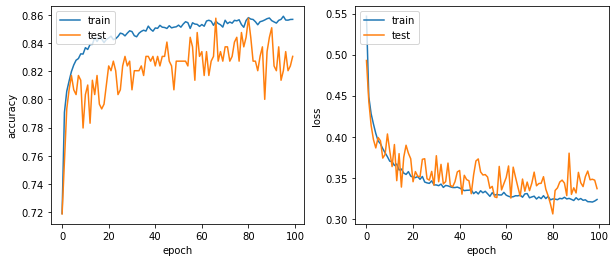

119/119 [==============================] - 0s 667us/step - loss: 0.3255 - accuracy: 0.8630
0.32554298639297485
Nodes: 32 , dropout rate: 0.2, learning rate: 0.001 and batch size: 128


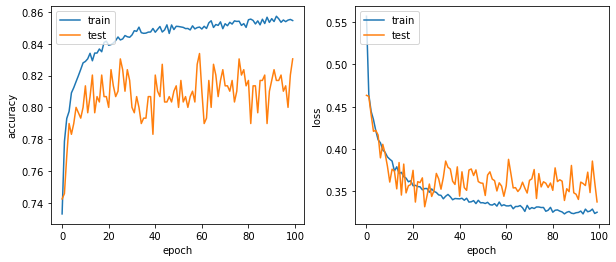

119/119 [==============================] - 0s 753us/step - loss: 0.3261 - accuracy: 0.8667
0.32609519362449646
Nodes: 32 , dropout rate: 0.25, learning rate: 0.01 and batch size: 32


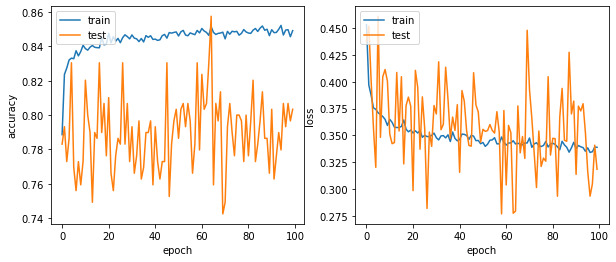

119/119 [==============================] - 0s 873us/step - loss: 0.3300 - accuracy: 0.8736
0.3300340473651886
Nodes: 32 , dropout rate: 0.25, learning rate: 0.01 and batch size: 64


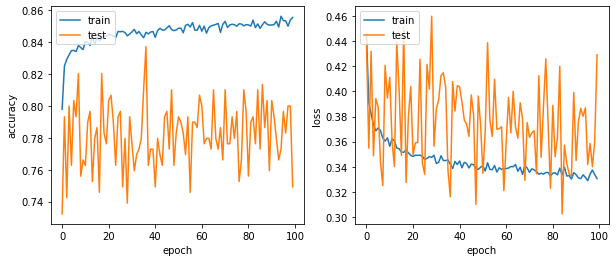

119/119 [==============================] - 0s 919us/step - loss: 0.3160 - accuracy: 0.8693
0.3159603178501129
Nodes: 32 , dropout rate: 0.25, learning rate: 0.01 and batch size: 128


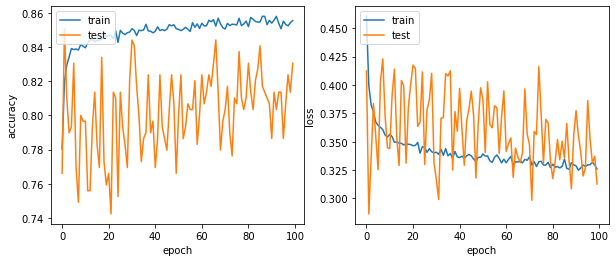

119/119 [==============================] - 0s 966us/step - loss: 0.3376 - accuracy: 0.8672
0.3376396894454956
Nodes: 32 , dropout rate: 0.25, learning rate: 0.005 and batch size: 32


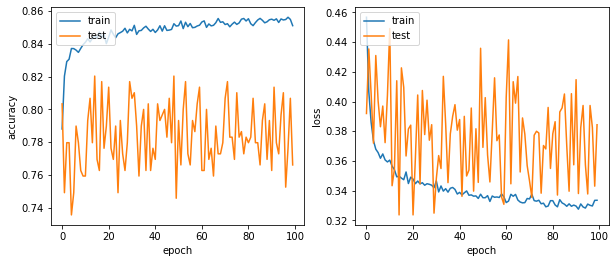

119/119 [==============================] - 0s 809us/step - loss: 0.3234 - accuracy: 0.8696
0.3233593702316284
Nodes: 32 , dropout rate: 0.25, learning rate: 0.005 and batch size: 64


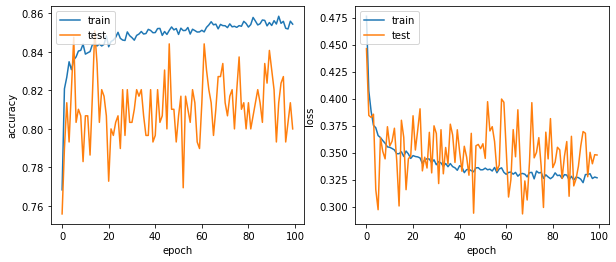

119/119 [==============================] - 0s 777us/step - loss: 0.3226 - accuracy: 0.8662
0.322568416595459
Nodes: 32 , dropout rate: 0.25, learning rate: 0.005 and batch size: 128


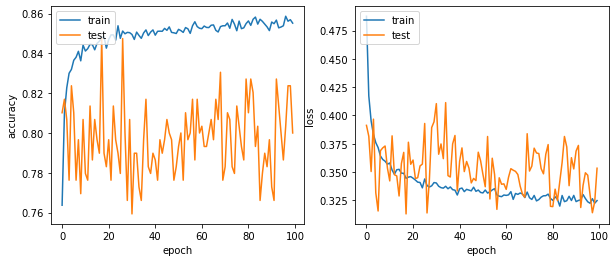

119/119 [==============================] - 0s 667us/step - loss: 0.3204 - accuracy: 0.8691
0.3203635513782501
Nodes: 32 , dropout rate: 0.25, learning rate: 0.001 and batch size: 32


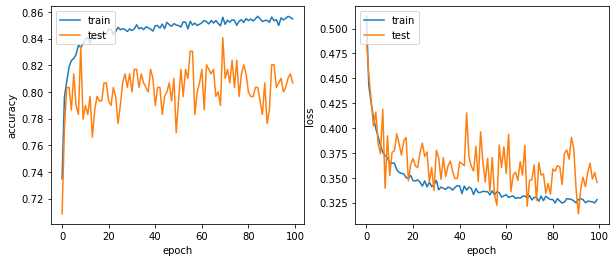

119/119 [==============================] - 0s 822us/step - loss: 0.3196 - accuracy: 0.8683
0.31960490345954895
Nodes: 32 , dropout rate: 0.25, learning rate: 0.001 and batch size: 64


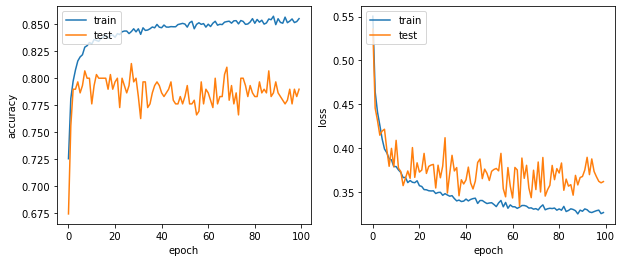

119/119 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8654
0.3228150010108948
Nodes: 32 , dropout rate: 0.25, learning rate: 0.001 and batch size: 128


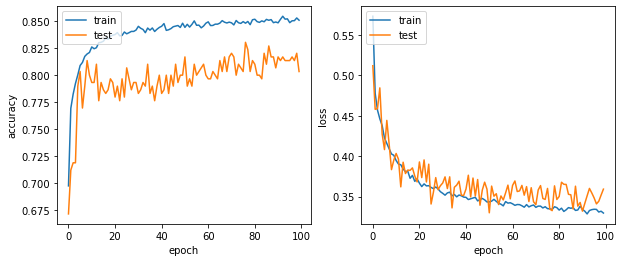

119/119 [==============================] - 0s 913us/step - loss: 0.3173 - accuracy: 0.8707
0.3172902464866638
Nodes: 64 , dropout rate: 0.1, learning rate: 0.01 and batch size: 32


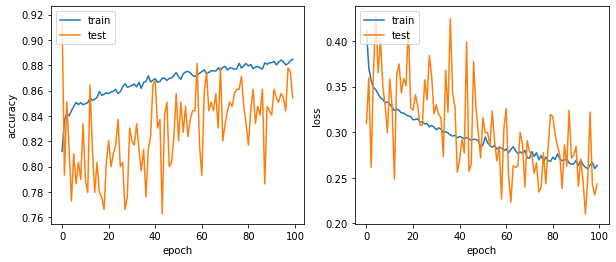

119/119 [==============================] - 0s 837us/step - loss: 0.3444 - accuracy: 0.8680
0.34437987208366394
Nodes: 64 , dropout rate: 0.1, learning rate: 0.01 and batch size: 64


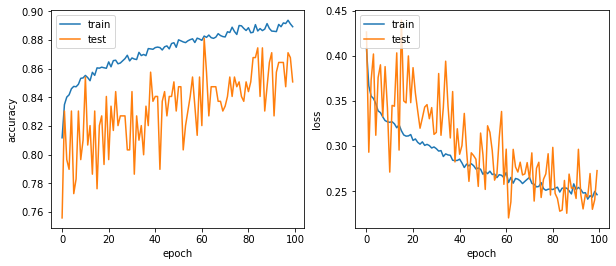

119/119 [==============================] - 0s 705us/step - loss: 0.3324 - accuracy: 0.8717
0.33236202597618103
Nodes: 64 , dropout rate: 0.1, learning rate: 0.01 and batch size: 128


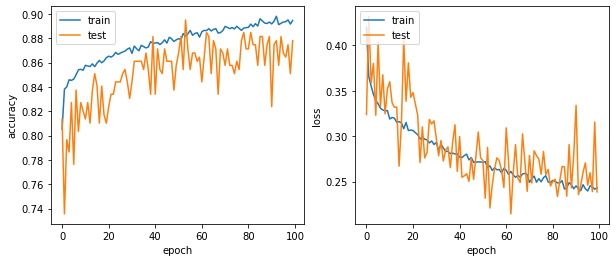

119/119 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8528
0.3624066710472107
Nodes: 64 , dropout rate: 0.1, learning rate: 0.005 and batch size: 32


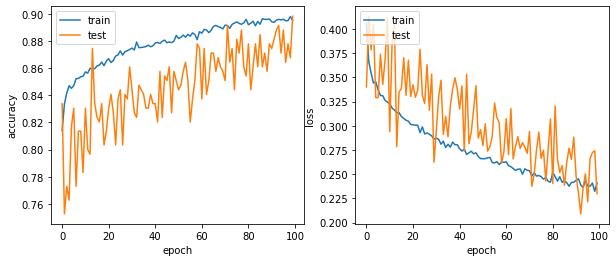

119/119 [==============================] - 0s 774us/step - loss: 0.3489 - accuracy: 0.8675
0.34894055128097534
Nodes: 64 , dropout rate: 0.1, learning rate: 0.005 and batch size: 64


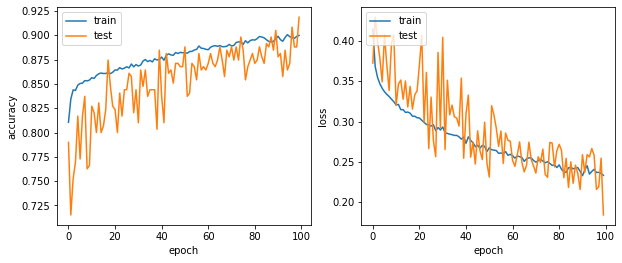

119/119 [==============================] - 0s 549us/step - loss: 0.3533 - accuracy: 0.8583
0.3533238470554352
Nodes: 64 , dropout rate: 0.1, learning rate: 0.005 and batch size: 128


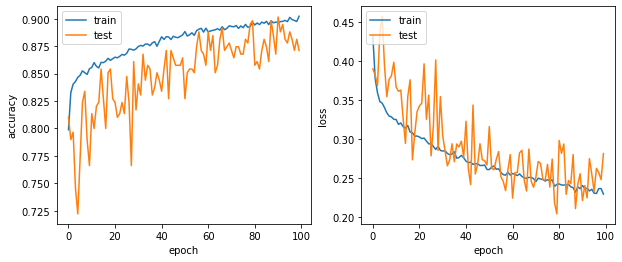

119/119 [==============================] - 0s 798us/step - loss: 0.3327 - accuracy: 0.8699
0.33268943428993225
Nodes: 64 , dropout rate: 0.1, learning rate: 0.001 and batch size: 32


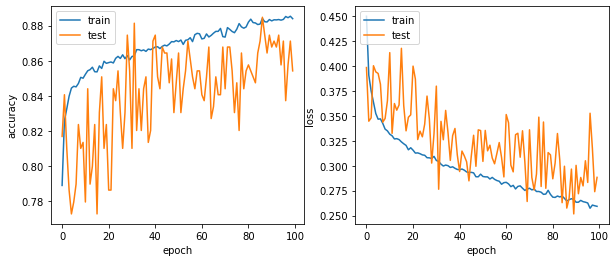

119/119 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8617
0.3263331949710846
Nodes: 64 , dropout rate: 0.1, learning rate: 0.001 and batch size: 64


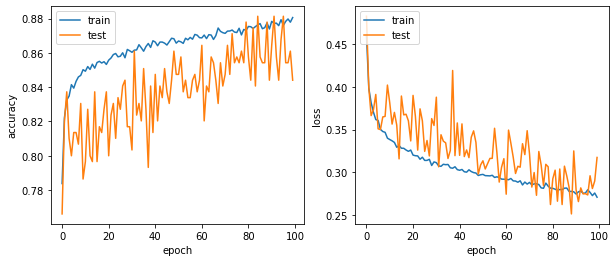

119/119 [==============================] - 0s 704us/step - loss: 0.3137 - accuracy: 0.8696
0.3137473464012146
Nodes: 64 , dropout rate: 0.1, learning rate: 0.001 and batch size: 128


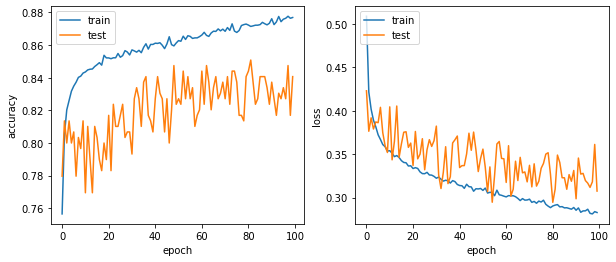

119/119 [==============================] - 0s 938us/step - loss: 0.3141 - accuracy: 0.8715
0.3140813112258911
Nodes: 64 , dropout rate: 0.2, learning rate: 0.01 and batch size: 32


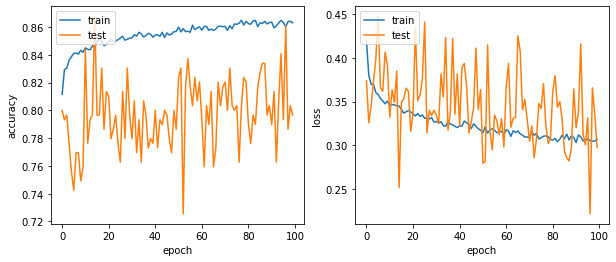

119/119 [==============================] - 0s 680us/step - loss: 0.3330 - accuracy: 0.8670
0.33301812410354614
Nodes: 64 , dropout rate: 0.2, learning rate: 0.01 and batch size: 64


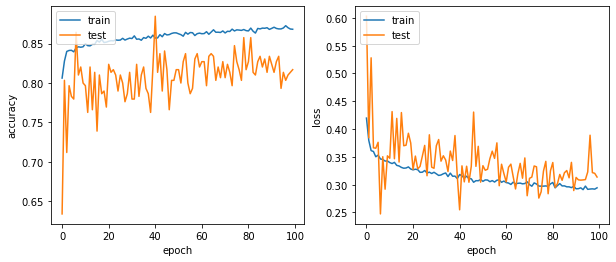

119/119 [==============================] - 0s 724us/step - loss: 0.3279 - accuracy: 0.8736
0.3278503715991974
Nodes: 64 , dropout rate: 0.2, learning rate: 0.01 and batch size: 128


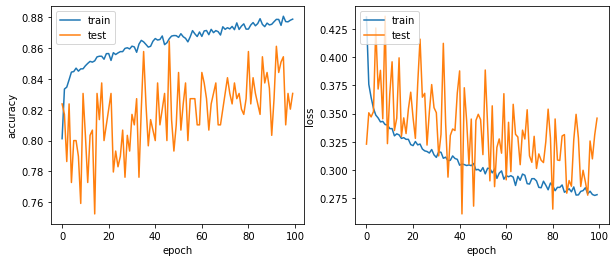

119/119 [==============================] - 0s 577us/step - loss: 0.3142 - accuracy: 0.8715
0.31421199440956116
Nodes: 64 , dropout rate: 0.2, learning rate: 0.005 and batch size: 32


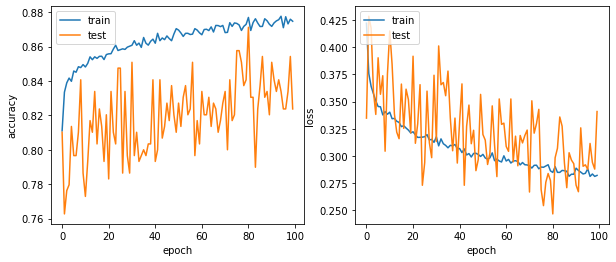

119/119 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8720
0.32087698578834534
Nodes: 64 , dropout rate: 0.2, learning rate: 0.005 and batch size: 64


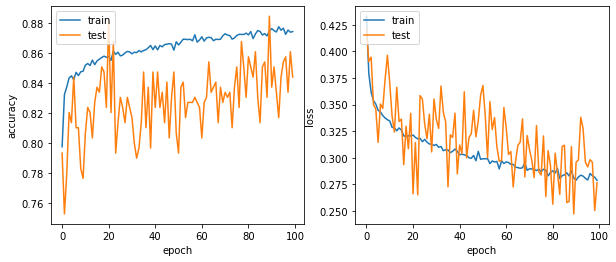

119/119 [==============================] - 0s 675us/step - loss: 0.3287 - accuracy: 0.8641
0.3287317156791687
Nodes: 64 , dropout rate: 0.2, learning rate: 0.005 and batch size: 128


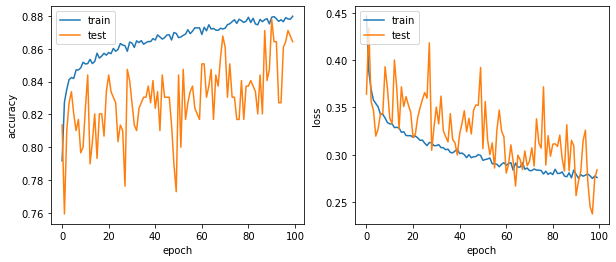

119/119 [==============================] - 0s 721us/step - loss: 0.3186 - accuracy: 0.8715
0.31864112615585327
Nodes: 64 , dropout rate: 0.2, learning rate: 0.001 and batch size: 32


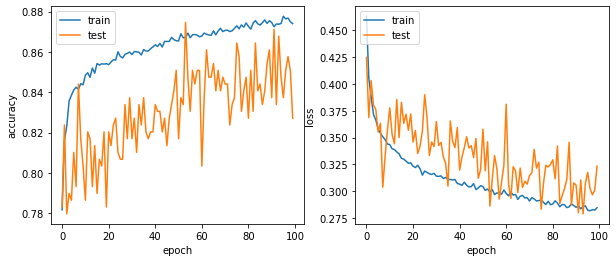

119/119 [==============================] - 0s 628us/step - loss: 0.3091 - accuracy: 0.8754
0.3090971112251282
Nodes: 64 , dropout rate: 0.2, learning rate: 0.001 and batch size: 64


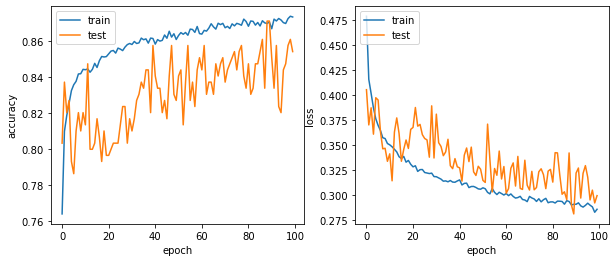

119/119 [==============================] - 0s 869us/step - loss: 0.3183 - accuracy: 0.8688
0.3183037042617798
Nodes: 64 , dropout rate: 0.2, learning rate: 0.001 and batch size: 128


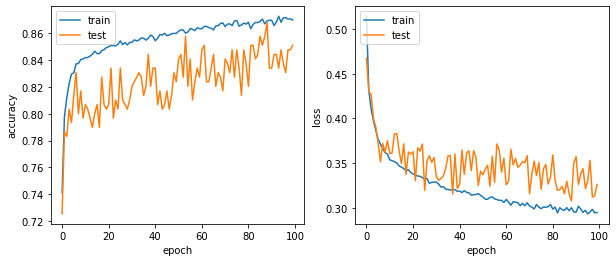

119/119 [==============================] - 0s 644us/step - loss: 0.3127 - accuracy: 0.8741
0.3126527667045593
Nodes: 64 , dropout rate: 0.25, learning rate: 0.01 and batch size: 32


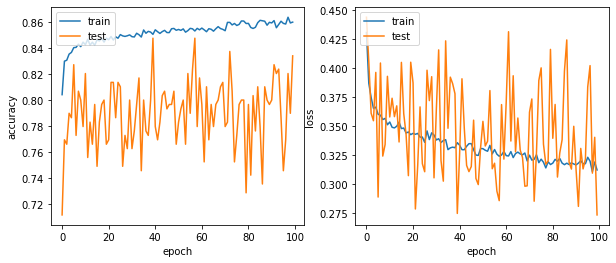

119/119 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8662
0.3573770523071289
Nodes: 64 , dropout rate: 0.25, learning rate: 0.01 and batch size: 64


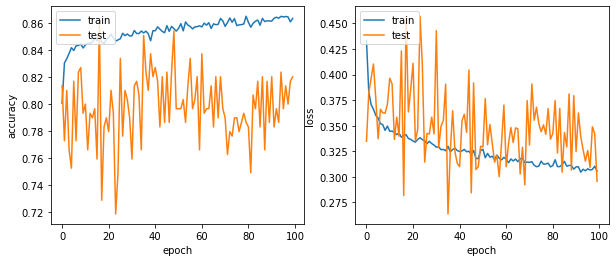

119/119 [==============================] - 0s 737us/step - loss: 0.3376 - accuracy: 0.8665
0.3376014530658722
Nodes: 64 , dropout rate: 0.25, learning rate: 0.01 and batch size: 128


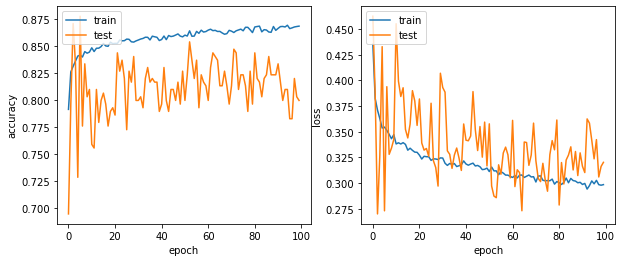

119/119 [==============================] - 0s 691us/step - loss: 0.3145 - accuracy: 0.8757
0.3144736886024475
Nodes: 64 , dropout rate: 0.25, learning rate: 0.005 and batch size: 32


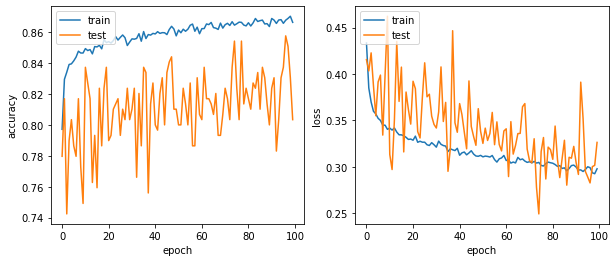

119/119 [==============================] - 0s 899us/step - loss: 0.3233 - accuracy: 0.8693
0.3232877552509308
Nodes: 64 , dropout rate: 0.25, learning rate: 0.005 and batch size: 64


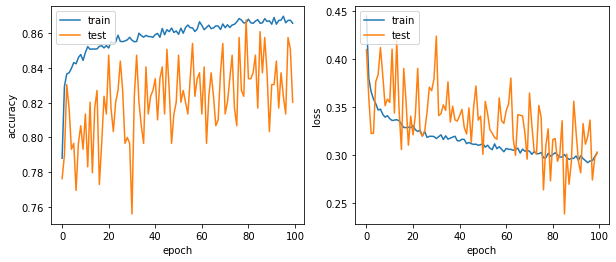

119/119 [==============================] - 0s 777us/step - loss: 0.3325 - accuracy: 0.8625
0.3325192332267761
Nodes: 64 , dropout rate: 0.25, learning rate: 0.005 and batch size: 128


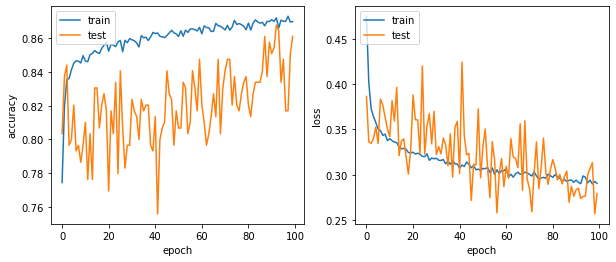

119/119 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8659
0.3227725327014923
Nodes: 64 , dropout rate: 0.25, learning rate: 0.001 and batch size: 32


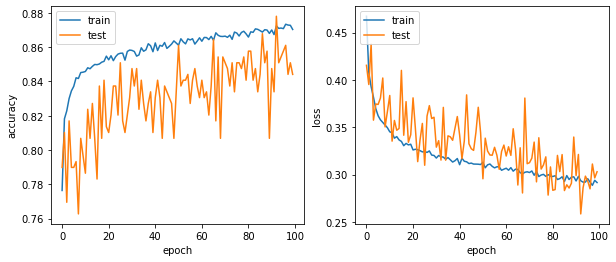

119/119 [==============================] - 0s 882us/step - loss: 0.3065 - accuracy: 0.8754
0.3064943253993988
Nodes: 64 , dropout rate: 0.25, learning rate: 0.001 and batch size: 64


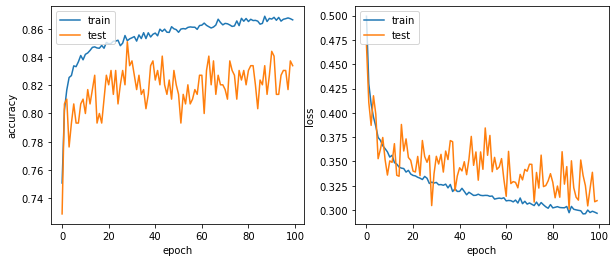

119/119 [==============================] - 0s 785us/step - loss: 0.3227 - accuracy: 0.8665
0.32270151376724243
Nodes: 64 , dropout rate: 0.25, learning rate: 0.001 and batch size: 128


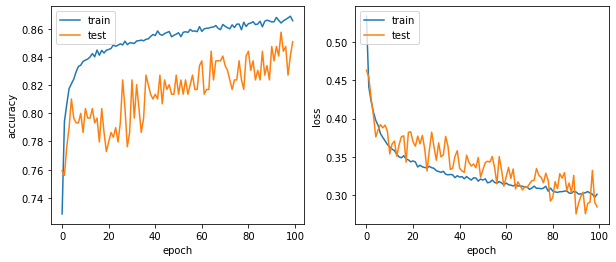

119/119 [==============================] - 0s 853us/step - loss: 0.3209 - accuracy: 0.8657
0.3209165334701538


In [35]:
least_loss = float('inf')
least_loss_model = None
epochs =100
validation_split = 0.02

for nd in [16,32,64]:
  for dp in [0.1,0.2,0.25]:
    for lr in [0.01,0.005,0.001]:
      for bs in [64,128]:
        # Number of runs = 3*3*3*2 = 54
        print(f"Nodes: {nd} , dropout rate: {dp}, learning rate: {lr} and batch size: {bs}")
        model, history = train_model(X_train,y_train,nd,dp,epochs,lr,bs,validation_split)
        plot_history(history)
        try:
          loss= model.evaluate(X_valid,y_valid)[0]
        except:
          loss= model.evaluate(X_valid,y_valid)
        print(loss)
        if loss < least_loss:
          least_loss = loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))